In [1]:
from keras.datasets import imdb
import numpy as np

In [2]:
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
train_labels[0]

1

In [6]:
max([max(seq) for seq in train_data])

9999

In [7]:
word_index = imdb.get_word_index()

In [8]:
reversed_index = {v:k for (k,v) in word_index.items()}

In [9]:
# Review decoded
print(" ".join([reversed_index.get(i-3,"?") for i in train_data[0]]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [3]:
def vectorize(sequences, dim = 10000):
    results = np.zeros((len(sequences),dim))
    for i, seq in enumerate(sequences):
        results[i,seq] = 1
    return results

In [4]:
X_train = vectorize(train_data)
X_test = vectorize(test_data)

In [12]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
X_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [7]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
    Dense(16, activation = 'relu', input_shape = (10000,)),
    Dense(16, activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
    loss= 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [10]:
# Validation data
X_val = X_train[:10000]
y_val = y_train[:10000]
X_train = X_train[10000:]
y_train = y_train[10000:]

In [20]:
X_val.shape,y_val.shape

((10000, 10000), (10000,))

In [21]:
X_train.shape,y_train.shape

((15000, 10000), (15000,))

In [22]:
history = model.fit(X_train,y_train,
          epochs= 20,
          batch_size = 512,
          validation_data = (X_val,y_val))

Epoch 1/20
30/30 [==============================] - 6s 108ms/step - loss: 0.4973 - accuracy: 0.8029 - val_loss: 0.3971 - val_accuracy: 0.8547
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3110 - accuracy: 0.9026 - val_loss: 0.3086 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2296 - accuracy: 0.9291 - val_loss: 0.2823 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1847 - accuracy: 0.9427 - val_loss: 0.2769 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1498 - accuracy: 0.9533 - val_loss: 0.2774 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1247 - accuracy: 0.9628 - val_loss: 0.2923 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1029 - accuracy: 0.9696 - val_loss: 0.3003 - val_accuracy: 0.8837
Epoch 8/20
3

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

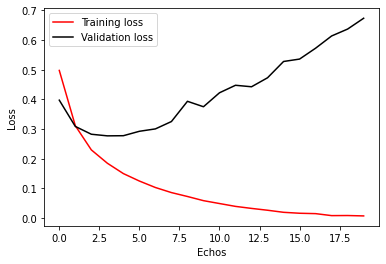

In [38]:
import matplotlib.pyplot as plt
echos = np.arange(20)
plt.plot(echos,history.history["loss"],'r',label = "Training loss")
plt.plot(echos,history.history["val_loss"],'k',label = "Validation loss")
plt.xlabel("Echos")
plt.ylabel("Loss")
plt.legend()

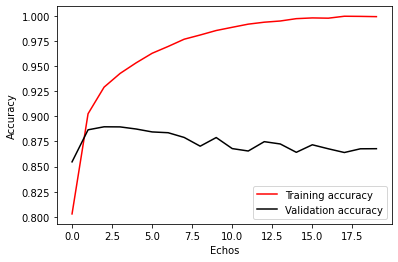

In [37]:
plt.clf()
plt.plot(echos,history.history["accuracy"],'r',label = "Training accuracy")
plt.plot(echos,history.history["val_accuracy"],'k',label = "Validation accuracy")
plt.xlabel("Echos")
plt.ylabel("Accuracy")
plt.legend()

**Conclusion**
* Training accuracy is inc : Good
* Training loss is dec : Good
* Validation accuracy is dec after 4th epoch & validation loss is increasing : **Overfitting**

In [40]:
model = Sequential([
    Dense(16, activation = 'relu', input_shape = (10000,)),
    Dense(16, activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

model.compile(
    loss= 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

history = model.fit(X_train,y_train,
          epochs= 4,
          batch_size = 512,
          validation_data = (X_val,y_val))

Epoch 1/4
30/30 [==============================] - 3s 84ms/step - loss: 0.5500 - accuracy: 0.7644 - val_loss: 0.4140 - val_accuracy: 0.8653
Epoch 2/4
30/30 [==============================] - 1s 27ms/step - loss: 0.3319 - accuracy: 0.8975 - val_loss: 0.3157 - val_accuracy: 0.8886
Epoch 3/4
30/30 [==============================] - 1s 27ms/step - loss: 0.2376 - accuracy: 0.9257 - val_loss: 0.2953 - val_accuracy: 0.8828
Epoch 4/4
30/30 [==============================] - 1s 29ms/step - loss: 0.1883 - accuracy: 0.9391 - val_loss: 0.2742 - val_accuracy: 0.8912


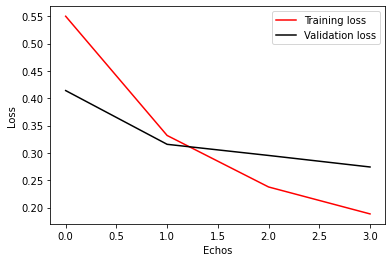

In [44]:
plt.clf()
plt.plot(np.arange(4),history.history["loss"],'r',label = "Training loss")
plt.plot(np.arange(4),history.history["val_loss"],'k',label = "Validation loss")
plt.xlabel("Echos")
plt.ylabel("Loss")
plt.legend()

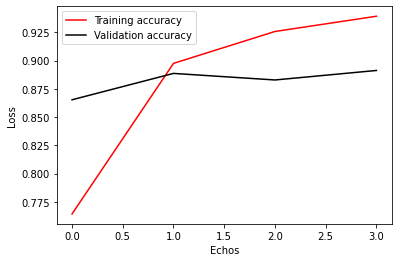

In [45]:
plt.clf()
plt.plot(np.arange(4),history.history["accuracy"],'r',label = "Training accuracy")
plt.plot(np.arange(4),history.history["val_accuracy"],'k',label = "Validation accuracy")
plt.xlabel("Echos")
plt.ylabel("Loss")
plt.legend()

In [46]:
results = model.evaluate(X_test,y_test)
results

782/782 [==============================] - 4s 5ms/step - loss: 0.2936 - accuracy: 0.8824


[0.293637216091156, 0.8824399709701538]

In [47]:
model.metrics_names

['loss', 'accuracy']

Loss : 29.36%

Accuracy : 88.24%

In [48]:
y_pred = model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


In [49]:
y_pred

array([[0.2312915 ],
       [0.99933666],
       [0.9653134 ],
       ...,
       [0.10763847],
       [0.12520961],
       [0.42594585]], dtype=float32)

In [11]:
model = Sequential([
    Dense(16, activation = 'relu', input_shape = (10000,)),
    Dense(16, activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

model.compile(
    loss= 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(X_train,y_train,
          epochs= 4,
          batch_size = 512,
          validation_data = (X_val,y_val))

Epoch 1/4
30/30 [==============================] - 6s 104ms/step - loss: 0.5861 - accuracy: 0.7045 - val_loss: 0.4563 - val_accuracy: 0.8470
Epoch 2/4
30/30 [==============================] - 1s 29ms/step - loss: 0.3420 - accuracy: 0.8926 - val_loss: 0.3149 - val_accuracy: 0.8859
Epoch 3/4
30/30 [==============================] - 1s 25ms/step - loss: 0.2229 - accuracy: 0.9287 - val_loss: 0.2801 - val_accuracy: 0.8908
Epoch 4/4
30/30 [==============================] - 1s 24ms/step - loss: 0.1622 - accuracy: 0.9506 - val_loss: 0.2795 - val_accuracy: 0.8879


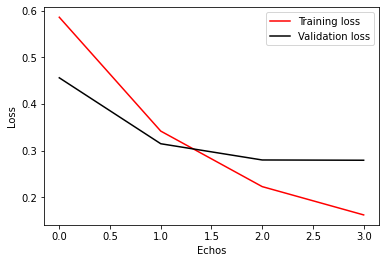

In [13]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(np.arange(4),history.history["loss"],'r',label = "Training loss")
plt.plot(np.arange(4),history.history["val_loss"],'k',label = "Validation loss")
plt.xlabel("Echos")
plt.ylabel("Loss")
plt.legend()

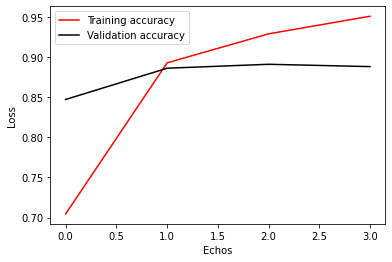

In [14]:
plt.clf()
plt.plot(np.arange(4),history.history["accuracy"],'r',label = "Training accuracy")
plt.plot(np.arange(4),history.history["val_accuracy"],'k',label = "Validation accuracy")
plt.xlabel("Echos")
plt.ylabel("Loss")
plt.legend()

In [15]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.2984 - accuracy: 0.8795


[0.29835009574890137, 0.8795199990272522]